<a href="https://colab.research.google.com/github/shivanibaskar/Indian-Liver-Patient-Records/blob/master/Indian_Liver_Patient_Records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [69]:
data=pd.read_csv("/gdrive/My Drive/liver disease/indian_liver_patient.csv")
print(data.head)
print(data.info())


<bound method NDFrame.head of      Age  Gender  Total_Bilirubin  ...  Albumin  Albumin_and_Globulin_Ratio  Dataset
0     65  Female              0.7  ...      3.3                        0.90        1
1     62    Male             10.9  ...      3.2                        0.74        1
2     62    Male              7.3  ...      3.3                        0.89        1
3     58    Male              1.0  ...      3.4                        1.00        1
4     72    Male              3.9  ...      2.4                        0.40        1
..   ...     ...              ...  ...      ...                         ...      ...
578   60    Male              0.5  ...      1.6                        0.37        2
579   40    Male              0.6  ...      3.2                        1.10        1
580   52    Male              0.8  ...      3.2                        1.00        1
581   31    Male              1.3  ...      3.4                        1.00        1
582   38    Male              1.0  

In [70]:
print(data.describe(include="all"))

               Age Gender  ...  Albumin_and_Globulin_Ratio     Dataset
count   583.000000    583  ...                  579.000000  583.000000
unique         NaN      2  ...                         NaN         NaN
top            NaN   Male  ...                         NaN         NaN
freq           NaN    441  ...                         NaN         NaN
mean     44.746141    NaN  ...                    0.947064    1.286449
std      16.189833    NaN  ...                    0.319592    0.452490
min       4.000000    NaN  ...                    0.300000    1.000000
25%      33.000000    NaN  ...                    0.700000    1.000000
50%      45.000000    NaN  ...                    0.930000    1.000000
75%      58.000000    NaN  ...                    1.100000    2.000000
max      90.000000    NaN  ...                    2.800000    2.000000

[11 rows x 11 columns]


In [71]:
#to check if there are null values
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [72]:
data["Albumin_and_Globulin_Ratio"] = data.Albumin_and_Globulin_Ratio.fillna(data['Albumin_and_Globulin_Ratio'].mean())

                                 Age  ...   Dataset
Age                         1.000000  ... -0.137351
Total_Bilirubin             0.011763  ... -0.220208
Direct_Bilirubin            0.007529  ... -0.246046
Alkaline_Phosphotase        0.080425  ... -0.184866
Alamine_Aminotransferase   -0.086883  ... -0.163416
Aspartate_Aminotransferase -0.019910  ... -0.151934
Total_Protiens             -0.187461  ...  0.035008
Albumin                    -0.265924  ...  0.161388
Albumin_and_Globulin_Ratio -0.216089  ...  0.162319
Dataset                    -0.137351  ...  1.000000

[10 rows x 10 columns]


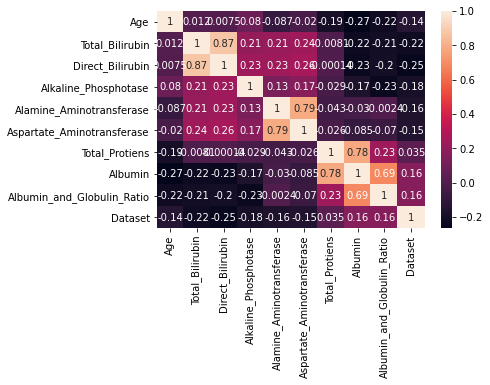

In [73]:
print(data.corr())
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

In [74]:
data=data.join(pd.get_dummies(data['Gender']))
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset', 'Female', 'Male'],
      dtype='object')

In [81]:
#the correlation plot shoes high correlation between some features so excluding such features
x=data.drop(labels=['Dataset','Gender','Male'],axis=1)
y=data['Dataset']
y=[0 if y[i]==2 and 1 else y[i]==1 for i in range(len(y))]

In [101]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,shuffle=True)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [102]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score,roc_curve

In [103]:
def modelcheck(name,classifier):
  classifier.fit(xtrain, ytrain)
  ypred = classifier.predict(xtest)
  yscore = classifier.predict_proba(xtest)[:,1]
  print("Accuracy:",accuracy_score(ytest, ypred))
  print("Precision:",precision_score(ytest, ypred))
  print("Recall:",recall_score(ytest, ypred))
  false_positive_rate, true_positive_rate, threshold = roc_curve(ytest, yscore)
  print('roc_auc_score', roc_auc_score(ytest, yscore))
  # Plot ROC curves
  plt.title('Receiver Operating Characteristic of '+name)
  plt.plot(false_positive_rate, true_positive_rate)
  plt.plot([0, 1], ls="--")
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()


Accuracy: 0.6571428571428571
Precision: 0.9066666666666666
Recall: 0.5619834710743802
roc_auc_score 0.7695133149678605


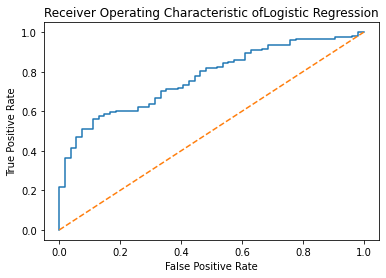

In [104]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state = 1,fit_intercept=False)
modelcheck('Logistic Regression',classifier)

Accuracy: 0.68
Precision: 0.7152317880794702
Recall: 0.8925619834710744
roc_auc_score 0.709519436792164


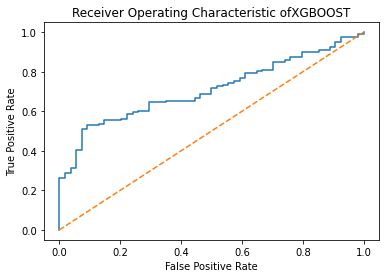

In [106]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
modelcheck("XGBOOST",classifier)

Accuracy: 0.6514285714285715
Precision: 0.7307692307692307
Recall: 0.7851239669421488
roc_auc_score 0.6439393939393939


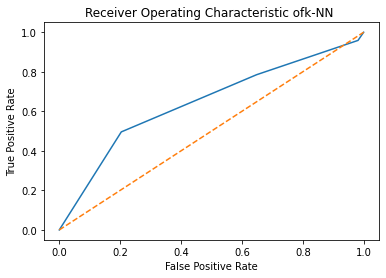

In [107]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
modelcheck("k-NN ",classifier)

Accuracy: 0.6571428571428571
Precision: 0.7364341085271318
Recall: 0.7851239669421488
roc_auc_score 0.5777471686562596


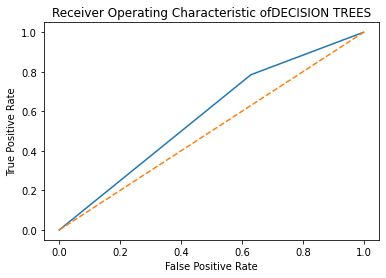

In [108]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier(random_state = 0) 
modelcheck("DECISION TREES",classifier)

Accuracy: 0.6857142857142857
Precision: 0.746268656716418
Recall: 0.8264462809917356
roc_auc_score 0.7496173859810223


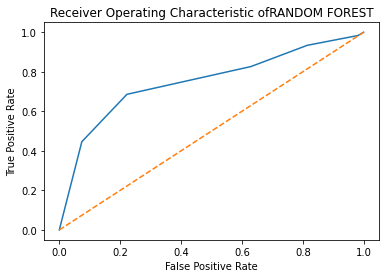

In [109]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 6, criterion = 'entropy', random_state = 0)
modelcheck("RANDOM FOREST",classifier)

Accuracy: 0.6857142857142857
Precision: 0.7323943661971831
Recall: 0.859504132231405
roc_auc_score 0.7396694214876032


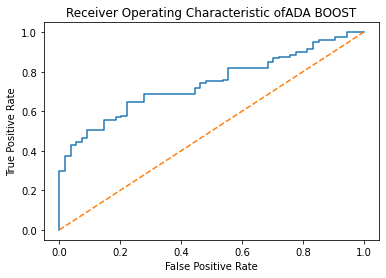

In [111]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=1000,learning_rate=0.1)
modelcheck("ADA BOOST",classifier)